In [1]:
# Set working directory.

import os

os.chdir(r'Q:\home\Metasynchronous cell divisions\H1 Alexa 488 injection\Injection in AB\LSM800up\29 C_Controlled Temperature\2021-09-16/Embryo 1')
cwd = os.getcwd()
cwd


# Import data file.
import numpy as np
import pandas as pd
from ipywidgets import *
from tkinter import Tk, filedialog
from IPython.display import clear_output, display

# Choose the Imaris output file.

def select_files(b):
    clear_output()                                         # Button is deleted after it is clicked.
    root = Tk()
    root.withdraw()                                        # Hide the main window.
    root.call('wm', 'attributes', '.', '-topmost', True)   # Raise the root to the top of all windows.
    b.files = filedialog.askopenfilename(multiple=False)    # List of selected files will be set button's file attribute.
    print(b.files)                                         # Print the list of files selected.
    
fileselect = Button(description="Select File")
fileselect.on_click(select_files)

display(fileselect) # Choose one of the distance files.

H:/Metasynchronous cell divisions/H1 Alexa 488 injection/Injection in AB/LSM800up/29 C_Controlled Temperature/2021-09-16/Embryo 1/Distance data 128-256.xlsx


In [2]:
# Call the file in the above location 'file'. 
file = fileselect.files

# Read the 'file'. Call it df.
df = pd.read_excel (file, header=0) # This line reads the 'position' sheet in the excel file. header=1 tells pandas
# that the first row has headers. The counting of rows starts with zero and moves forward as 0,1,2, etc.
df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Position X,Position Y,Position Z,Time,ID,Time_seconds,Cell_number,Distance,Adjusted_Time
0,0,0,48,295.266998,345.031006,159.397995,86,53,2676.062,48,0.000000,0.000
1,1,1,49,306.820007,358.756989,86.343102,86,87,2676.062,49,75.225608,0.000
2,2,2,55,308.292999,263.920990,143.026993,87,86,2707.179,50,83.764677,31.117
3,3,3,57,273.364014,195.289001,133.311005,87,104,2707.179,51,153.567378,31.117
4,4,4,56,292.187012,565.901001,49.873402,87,88,2707.179,52,246.553600,31.117
5,5,5,54,339.285004,154.397003,102.500000,87,76,2707.179,53,203.755465,31.117
6,6,6,50,255.112000,297.613007,85.629898,87,52,2707.179,54,96.450105,31.117
7,7,7,52,273.187988,434.876007,134.216003,87,55,2707.179,55,95.883990,31.117
8,8,8,51,229.744995,296.364990,144.929001,87,54,2707.179,56,82.890686,31.117
9,9,9,53,341.481995,443.610992,118.352997,87,56,2707.179,57,116.355195,31.117


In [3]:
timepoints = df.Adjusted_Time.unique()
timepoints

array([  0.   ,  31.117,  62.234,  93.351, 124.468, 155.585, 186.702,
       217.819, 248.936])

In [4]:
selected = df[df['Adjusted_Time'] == 0]
selected

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Position X,Position Y,Position Z,Time,ID,Time_seconds,Cell_number,Distance,Adjusted_Time
0,0,0,48,295.266998,345.031006,159.397995,86,53,2676.062,48,0.000000,0.0
1,1,1,49,306.820007,358.756989,86.343102,86,87,2676.062,49,75.225608,0.0


In [5]:
mean_x = selected['Position X'].mean()
mean_y = selected['Position Y'].mean()
mean_z = selected['Position Z'].mean()

In [8]:
output = []

for x, y, z, t in zip(df['Position X'], df['Position Y'], df['Position Z'], df['Adjusted_Time']):
    if t != 0:
        new_dist = (((x-mean_x)**2) + ((y-mean_y)**2) + ((z-mean_z)**2))**(1/2)
        output.append([x, y, z, new_dist, t])
        print((x,y,z), new_dist, t)

(308.2929992675781, 263.9209899902344, 143.0269927978516) 90.5432904857768 31.11700000000019
(273.364013671875, 195.2890014648438, 133.3110046386719) 159.3746590122709 31.11700000000019
(292.18701171875, 565.9010009765625, 49.8734016418457) 226.28746875550124 31.11700000000019
(339.2850036621094, 154.3970031738281, 102.5) 202.1940510250119 31.11700000000019
(255.1119995117188, 297.6130065917969, 85.62989807128906) 80.26826870692963 31.11700000000019
(273.18798828125, 434.8760070800781, 134.2160034179688) 88.26473252402334 31.11700000000019
(229.7449951171875, 296.364990234375, 144.9290008544922) 93.02431479997455 31.11700000000019
(341.4819946289062, 443.6109924316406, 118.3529968261719) 100.33786477372334 31.11700000000019
(205.2720031738281, 216.6139984130859, 104.6439971923828) 166.74850936432705 62.23399999999992
(231.427001953125, 486.0379943847656, 74.6708984375) 158.6325168931528 62.23399999999992
(165.6549987792969, 333.7999877929688, 118.4130020141602) 136.6649549723776 62.233

In [6]:
# Provide information for saving the files
div_round = input('Which round of division?')
date = input('On which date was the imaging done?')

Which round of division?128-256
On which date was the imaging done?16092021_Embryo1


In [9]:
df_output = pd.DataFrame(output, columns=["Position X", "Position Y", "Position Z", "Distance from mean source position", "Time"])
df_output.to_excel("Distances from mean source position_" + div_round + "_" + date + ".xlsx")
df_output

,Position X,Position Y,Position Z,Distance from mean source position,Time
0,308.292999,263.920990,143.026993,90.543290,31.117
1,273.364014,195.289001,133.311005,159.374659,31.117
2,292.187012,565.901001,49.873402,226.287469,31.117
3,339.285004,154.397003,102.500000,202.194051,31.117
4,255.112000,297.613007,85.629898,80.268269,31.117
5,273.187988,434.876007,134.216003,88.264733,31.117
6,229.744995,296.364990,144.929001,93.024315,31.117
7,341.481995,443.610992,118.352997,100.337865,31.117
8,205.272003,216.613998,104.643997,166.748509,62.234
9,231.427002,486.037994,74.670898,158.632517,62.234


In [10]:
df_output = df_output.round(2)
df_output

,Position X,Position Y,Position Z,Distance from mean source position,Time
0,308.29,263.92,143.03,90.54,31.12
1,273.36,195.29,133.31,159.37,31.12
2,292.19,565.90,49.87,226.29,31.12
3,339.29,154.40,102.50,202.19,31.12
4,255.11,297.61,85.63,80.27,31.12
5,273.19,434.88,134.22,88.26,31.12
6,229.74,296.36,144.93,93.02,31.12
7,341.48,443.61,118.35,100.34,31.12
8,205.27,216.61,104.64,166.75,62.23
9,231.43,486.04,74.67,158.63,62.23


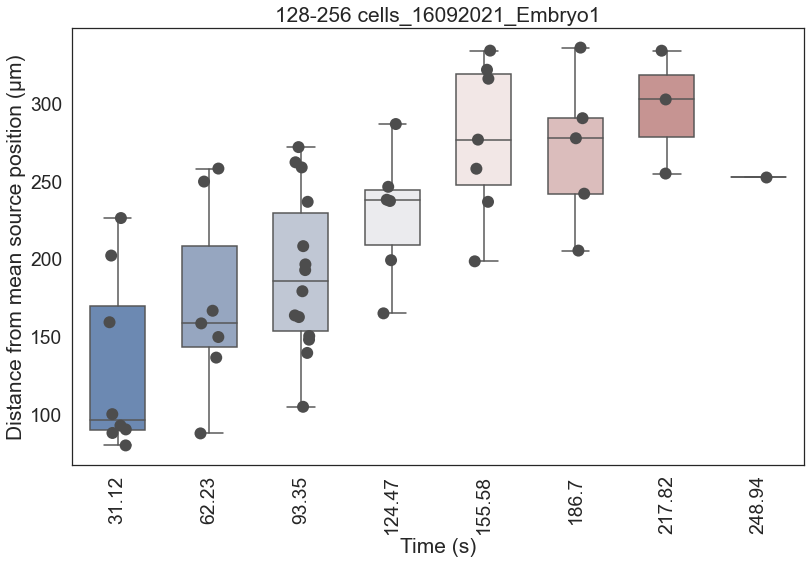

In [11]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(style='white', font_scale = 1.75)

g1 = sns.boxplot(x = 'Time', y = 'Distance from mean source position', data = df_output, width=.6, palette="vlag")
g1.set_xlabel('Time (s)')
g1.set_ylabel('Distance from mean source position (µm)')
g1.set_title(div_round + ' cells_' + date)

g2 = sns.stripplot(x = 'Time', y = 'Distance from mean source position', data = df_output, size=12, color=".3", linewidth=0)
g2.set_xlabel('Time (s)')
g2.set_ylabel('Distance from mean source position (µm)')
g2.set_title(div_round + ' cells_' + date)

plt.xticks(rotation='vertical')
plt.tight_layout()

plt.savefig('Distance from mean source position_' + div_round + '_' + date + '.svg')

<AxesSubplot:xlabel='Distance from mean source position', ylabel='Distance from mean source position'>

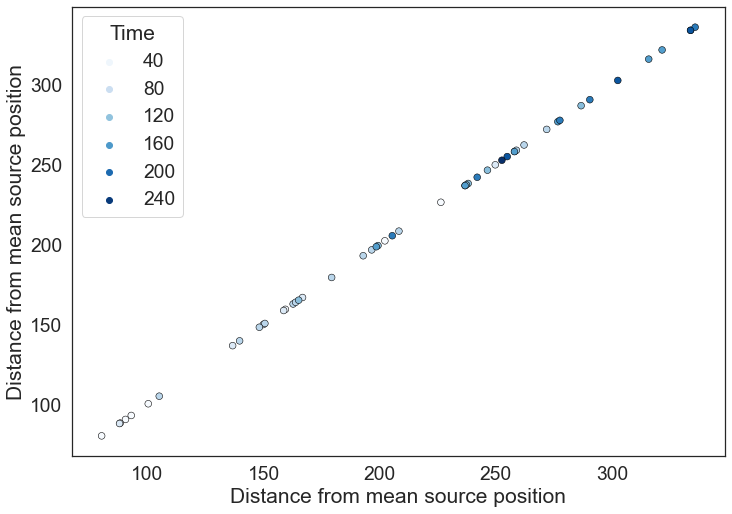

In [21]:
sns.scatterplot(x='Distance from mean source position', y = 'Distance from mean source position', hue = 'Time', data = df_output, palette = 'Blues', edgecolor = 'black', s = 45)